# ADS 505: Applied Data Science for Business

### Final Team Project

### Team 4: Jun Sik Ryu, Cynthia Portales-Loebell, and Akshat Patni

#### October 13, 2025

#### Dataset: WA_Fn-UseC_-Telco-Customer-Churn.csv

#### Github Link: https://github.com/jsryu-git/ADS505_Group4

### Import Libraries & Configure Settings

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
accuracy_score, roc_auc_score, mean_squared_error, mean_absolute_error, 
precision_score, recall_score, f1_score, ConfusionMatrixDisplay, 
RocCurveDisplay, PrecisionRecallDisplay)
from sklearn.base import ClassifierMixin
from sklearn.inspection import permutation_importance

### Load Data 

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

## 1. Problem Statement and Business Objective

The objective is to predict customer churn (attrition) in the next billing cycle for an active customer base using the Telco-Customer-Churn.csv dataset. 

By applying supervised machine learning models to customer behavioral and demographic data, this analysis aimed to predict churn probability for each customer and provide actionable insights for targeted retention campaigns. A predictive model that effectively identifies at-risk customers enables the business to implement proactive outreach, discount offers, or loyalty programs to retain valuable clients.

In [5]:
# Dataset overview
print(df.shape)
df.head()
df.info()

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

## 2. Data Description

The dataset contained approximately **7043** observations and **21** features representing customer demographics, service usage, billing information, and churn status.  

Key variables included:  
- **Target Variable:** `Churn` – 1 if the customer left, 0 otherwise.  
- **Predictors:** were the:  
Tenure – Number of months with the company  
Service Subscriptions – e.g. PhoneService, InternetService, OnlineSecurity, StreamingTV.  
Account Information – e.g. Contract, PaymentMethod, PaperlessBilling.  
Charge Details – MonthlyCharges, TotalCharges.  
  
Initial inspection revealed a mild class imbalance, with roughly **26.5**% churned customers. Some numerical features exhibited skewness, and categorical variables required encoding for model readiness. No severe multicollinearity was detected, and missing values were handled through appropriate imputation or removal.



### Exploratory Data Analysis

In [6]:
# Info summary
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


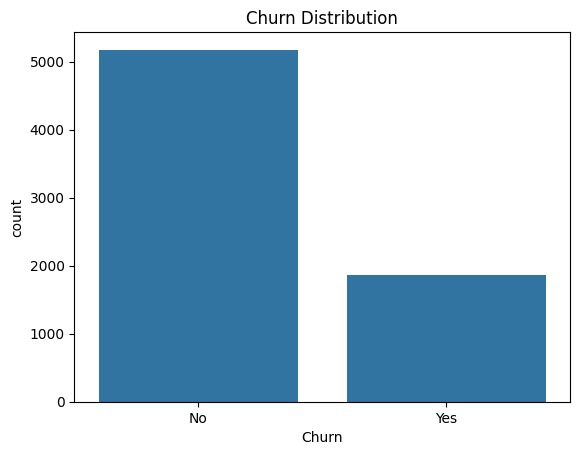

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [7]:
# Target variable countplot
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

# Percentage
df["Churn"].value_counts(normalize=True) * 100

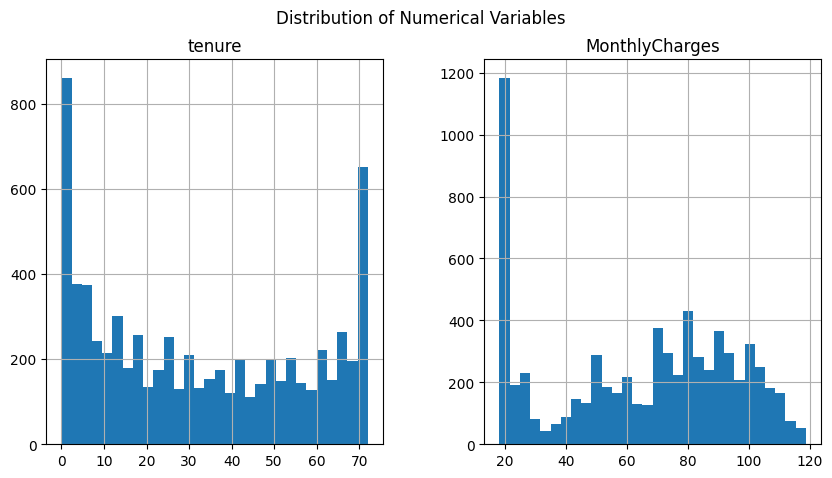

In [8]:
# Distribution of numerical variables

num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

df[num_cols].hist(bins=30, figsize=(10,5))
plt.suptitle("Distribution of Numerical Variables")
plt.show()

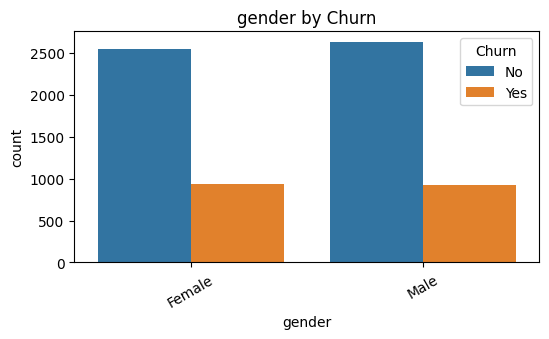

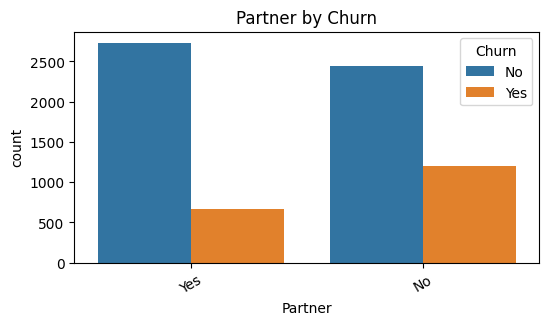

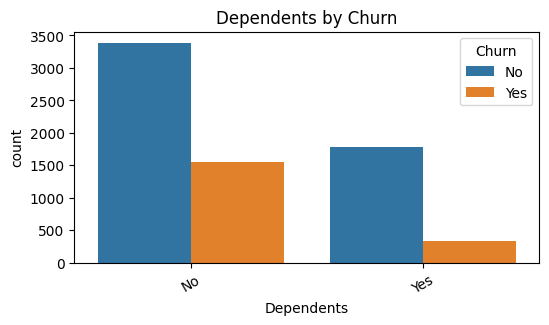

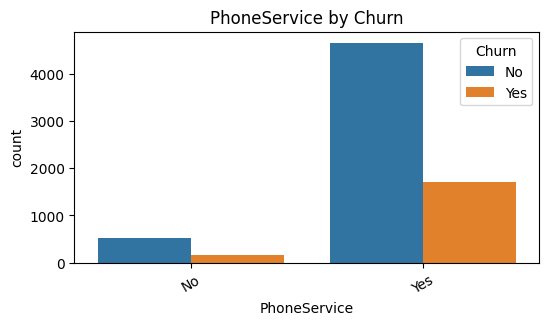

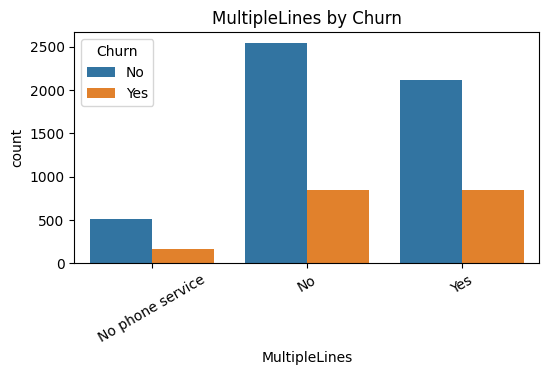

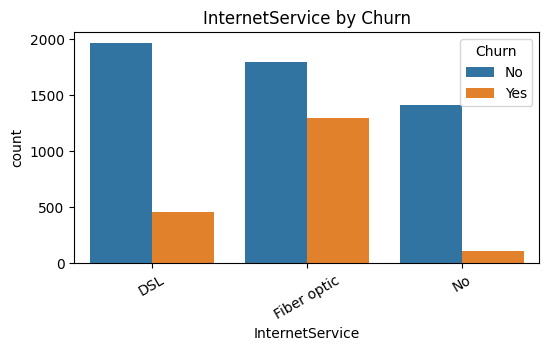

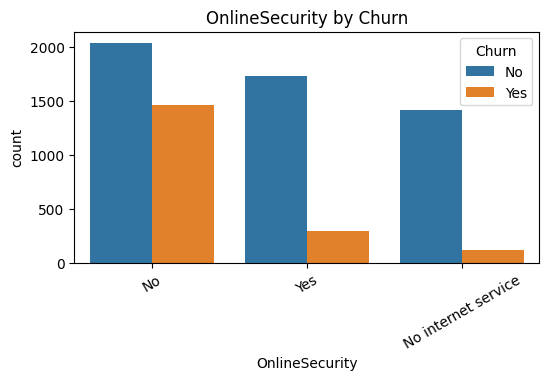

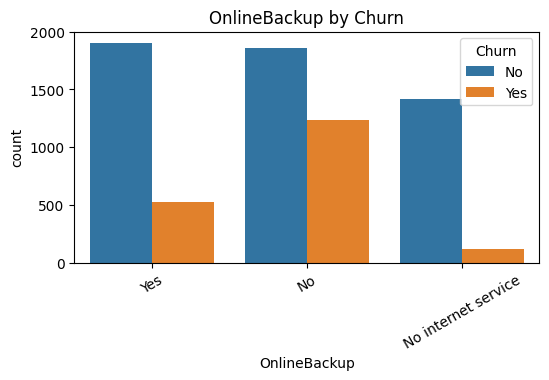

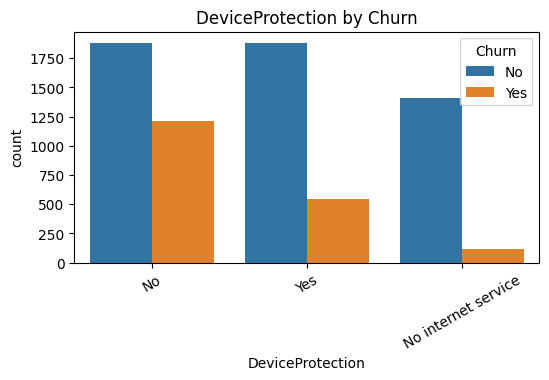

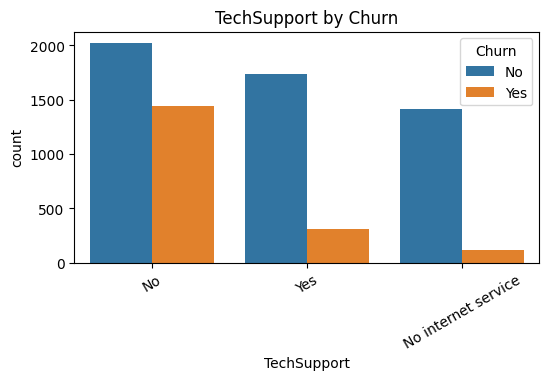

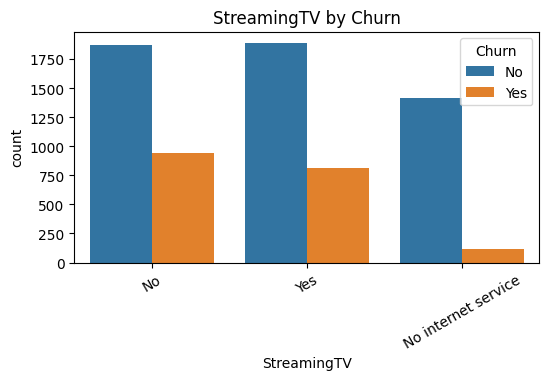

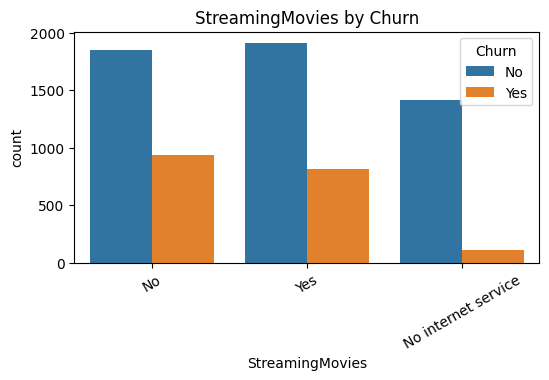

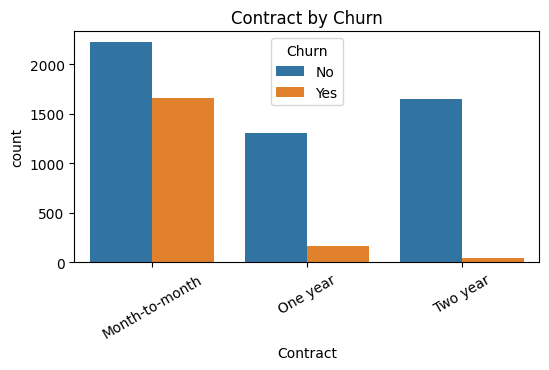

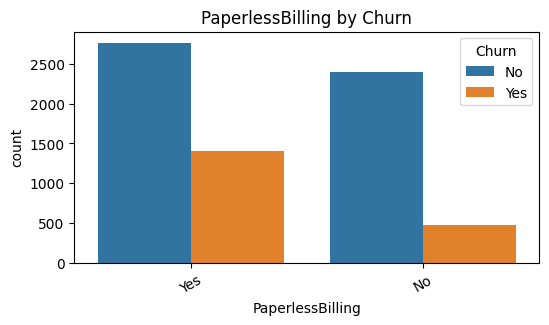

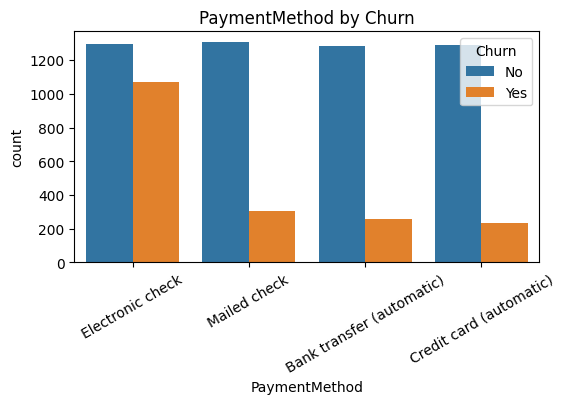

In [9]:
# Distribution of categorical variables

cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols = [col for col in cat_cols if col not in ["customerID", "Churn", "TotalCharges"]] # Remove unnecessary columns

# Barplots for categorical variables vs churn
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"{col} by Churn")
    plt.xticks(rotation=30)
    plt.show()
    

## 3. Exploratory Data Analysis (EDA)

EDA revealed distinct behavioral differences between retained and churned customers.  

Key findings included:
- Dataset Structure and Initial Data Types: The dataset contains a total of 7043 entries across 21 columns. Most of these columns are categorical, with 18 columns initially identified as object types, while only three columns were numerical (2 int64 and 1 float64).  
- Target Variable Imbalance: A significant finding was the distribution of the target variable, Churn. The data is imbalanced, showing that 73.46% of customers did not churn ("No"), compared to 26.54% of customers who did churn ("Yes").  
- Data Quality Issue in TotalCharges: Although most columns had 7043 non-null entries, the TotalCharges column was initially identified as an object data type. Subsequent checks revealed that this column contained 11 missing values (blanks as spaces), necessitating conversion to numeric and imputation during the preprocessing stage.  
- Average Customer Tenure: The descriptive statistics for the numerical variables showed that the average customer tenure is approximately 32.37 months.
- Average Monthly Charges: The mean MonthlyCharges across the customer base was determined to be approximately 64.76.  


### Data Preprocessing

In [10]:
# Handle Missing Values

# Convert TotalCharges to numeric (has blanks as spaces)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["tenure"] = pd.to_numeric(df["tenure"], errors="coerce")
df["MonthlyCharges"] = pd.to_numeric(df["MonthlyCharges"], errors="coerce")

# Check missing values
print(df.isnull().sum())

# Impute with median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [11]:
# Engineer new derived features

# Binary encoding for target
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0}).astype(int)

# Binary categorical columns mappings
binary_mappings = {
    "gender": {"Female": 1, "Male": 0},
    "SeniorCitizen": {1: 1, 0: 0},
    "Partner": {"Yes": 1, "No": 0},
    "Dependents": {"Yes": 1, "No": 0},
    "PhoneService": {"Yes": 1, "No": 0},
    "PaperlessBilling": {"Yes": 1, "No": 0}
}

# Apply mapping
for col, mapping in binary_mappings.items():
    df[col] = df[col].map(mapping)

# Flag high-value customers
df["HighValueCustomer"] = ((df["tenure"] > 50) & (df["MonthlyCharges"] > 70)).astype(int)

#Has multiple services? 
services_truthy_map = {
    "InternetService": ["DSL", "Fiber optic"],
    "PhoneService": ["Yes"],
    "OnlineSecurity": ["Yes"],
    "OnlineBackup": ["Yes"],
    "DeviceProtection": ["Yes"],
    "TechSupport": ["Yes"],
    "StreamingTV": ["Yes"],
    "StreamingMovies": ["Yes"]
}

df["NumServices"] = df.apply(
    lambda row: sum(row[col] in services_truthy_map[col] for col in services_truthy_map),
    axis=1)
df["HasMultipleServices"] = (df["NumServices"] >= 3).astype(int)

In [12]:
# Numeric & categorical pipelines for preprocessing

# Multi-class categorical columns
multi_class_cols = [
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaymentMethod"
]

num_cols = ["tenure", "MonthlyCharges", "TotalCharges", "NumServices"]

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, multi_class_cols)
], remainder="passthrough")

## 4. Data Pre-processing

Data cleaning and preparation steps were performed to ensure model integrity and comparability:

1. **Missing Values:** Missing values in TotalCharges (initially 11 missing values) were handled by imputing them with the median. The numerical pipeline (num_pipe) was set up to use SimpleImputer with a median strategy for numerical columns. The categorical pipeline (cat_pipe) was set up to use SimpleImputer with a most frequent strategy for multi-class categorical columns    
2. **Encoding:** Converted categorical variables (e.g., gender, payment method, contract type) using one-hot encoding. Target & Binary Columns: The target variable Churn was converted to a numerical binary format (Yes: 1, No: 0)  
3. **Scaling:** Numerical features were normalized using StandardScaler. This was implemented within the num_pipe. The numerical features included tenure, MonthlyCharges, TotalCharges, and the engineered feature NumServices.  


### Split/Prepare Data for Modeling

In [13]:
# Train-test split

X = df.drop(["Churn", "customerID"], axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set:", X_train.shape, "Testing set:", X_test.shape)

Training set: (4930, 22) Testing set: (2113, 22)


### Model Implementation 

- Implement grid search for hyperparameter tuning + 5 fold cross-validation for optimal model selection
- Implement PCA only for LR model

In [14]:
# Logistic Regression pipeline (with PCA)
lr_pipe = Pipeline([
    ("prep", preprocess),
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("clf", LogisticRegression(max_iter=2000, n_jobs=None))
])

lr_params = {
    "pca__n_components": [0.9, 0.95, 0.99],
    "clf__C": [0.1, 1, 5],
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs"]
}

# Random Forest pipeline
rf_pipe = Pipeline([
    ("prep", preprocess),
    ("clf", RandomForestClassifier(random_state=42))
])

rf_params = {
    "clf__n_estimators": [300, 600],
    "clf__max_depth": [None, 10, 20],
    "clf__min_samples_split": [2, 10],
    "clf__min_samples_leaf": [1, 5],
    "clf__class_weight": [None, "balanced"]
}

# XGBoost pipeline
xgb_pipe = Pipeline([
    ("prep", preprocess),
    ("clf", XGBClassifier(
        random_state=42,
        n_estimators=400,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        n_jobs=-1
    ))
])

xgb_params = {
    "clf__n_estimators": [300, 600],
    "clf__learning_rate": [0.03, 0.05, 0.1],
    "clf__max_depth": [3, 4, 6],
    "clf__subsample": [0.7, 0.9],
    "clf__colsample_bytree": [0.7, 0.9]
}

#Cross Validation Grids to select optimal model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grids = [
    GridSearchCV(lr_pipe, lr_params, scoring="roc_auc", cv=cv, n_jobs=-1, refit=True),
    GridSearchCV(rf_pipe, rf_params, scoring="roc_auc", cv=cv, n_jobs=-1, refit=True),
    GridSearchCV(xgb_pipe, xgb_params, scoring="roc_auc", cv=cv, n_jobs=-1, refit=True),
]

In [15]:
#Original model implementation without pipeline/grid search/cross validation
#Replaced to have more robust model implementation process
'''

# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 3. XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)

'''

"\n\n# 1. Logistic Regression\nlr = LogisticRegression(max_iter=1000, random_state=42)\nlr.fit(X_train, y_train)\n\n# 2. Random Forest\nrf = RandomForestClassifier(n_estimators=100, random_state=42)\nrf.fit(X_train, y_train)\n\n# 3. XGBoost\nxgb = XGBClassifier(\n    n_estimators=100,\n    learning_rate=0.1,\n    max_depth=3,\n    use_label_encoder=False,\n    eval_metric='logloss',\n    random_state=42\n)\nxgb.fit(X_train, y_train)\n\n"

#### Train models

In [16]:
#Iterate through grid search CV to select optimal model for each model type
#Then train optimal model on training data

#Logistic Regression Model
lr_grid = grids[0].fit(X_train, y_train)
lr_model = lr_grid.best_estimator_.fit(X_train, y_train)

#Random Forest Model
rf_grid = grids[1].fit(X_train, y_train)
rf_model = rf_grid.best_estimator_.fit(X_train, y_train)

#XGBoost Model 
xgb_grid = grids[2].fit(X_train, y_train)
xgb_model = xgb_grid.best_estimator_.fit(X_train, y_train)

print("LR Best CV ROC-AUC:", round(lr_grid.best_score_, 3))
print("RF Best CV ROC-AUC:", round(rf_grid.best_score_, 3))
print("XGB Best CV ROC-AUC:", round(xgb_grid.best_score_, 3))

LR Best CV ROC-AUC: 0.845
RF Best CV ROC-AUC: 0.847
XGB Best CV ROC-AUC: 0.848


## 8. Results and Final Model Selection

We tuned Logistic Regression, Random Forest, and XGBoost with 5-fold Stratified GridSearchCV using ROC-AUC as the selection metric. Cross-validated performance was very similar across models (LR = 0.845, RF = 0.847, XGB = 0.848), so we treated them as practically equivalent and selected XGBoost as the final model, confirming comparable generalization on the holdout test (ROC-AUC is 0.846). The best XGBoost configuration used shallow trees and conservative learning, which means fewer splits per tree to avoid overfitting and the model will learn the signal gradually (small learning rate across more trees). This should all yield better generalization on unseen customers and stable probability estimates. On the test set at the default 0.50 threshold, performance was: Accuracy 0.801, Precision 0.662, Recall 0.513, and F1 0.578. The confusion matrix was TN=1405, FP=147, FN=273, and TP=288. We considered retention to be recall-sensitive (it's costly to incorrectly label someone as "not churning" when they will actually "churn"), so therefore we performed a threshold sweep and selected T = 0.35. This threshold yielded Recall of 0.71, Precision of 0.56, F1 of 0.63, and Accuracy of 0.778, which is consistent with operating in a high-recall region while maintaining workable precision. This could therefore let us capture roughly 7 in 10 churners with acceptable precision, so that we could could reduce churn and protect revenue.

#### Final Model Selection

In [17]:
candidates = []
if 'lr_grid' in globals() and hasattr(lr_grid, "best_estimator_"):
    candidates.append(("LogReg", lr_grid.best_estimator_, getattr(lr_grid, "best_score_", np.nan)))
if 'rf_grid' in globals() and hasattr(rf_grid, "best_estimator_"):
    candidates.append(("RandomForest", rf_grid.best_estimator_, getattr(rf_grid, "best_score_", np.nan)))
if 'xgb_grid' in globals() and hasattr(xgb_grid, "best_estimator_"):
    candidates.append(("XGBoost", xgb_grid.best_estimator_, getattr(xgb_grid, "best_score_", np.nan)))

if not candidates:
    if 'lr' in globals() and hasattr(lr, "predict"): candidates.append(("LogReg", lr, np.nan))
    if 'rf' in globals() and hasattr(rf, "predict"): candidates.append(("RandomForest", rf, np.nan))
    if 'xgb' in globals() and hasattr(xgb, "predict"): candidates.append(("XGBoost", xgb, np.nan))

if not candidates:
    raise RuntimeError("No fitted models found—run training/grid search first.")

model_name, model, cv_auc = max(candidates, key=lambda t: (t[2] if t[2]==t[2] else -1))
print(f"Selected: {model_name}" + (f" (CV ROC-AUC={cv_auc:.3f})" if cv_auc==cv_auc else ""))

y_true_test = y_test
y_proba_test = model.predict_proba(X_test)[:, 1]  
test_auc = roc_auc_score(y_true_test, y_proba_test)
print(f"Holdout Test ROC-AUC: {test_auc:.3f}")

Selected: XGBoost (CV ROC-AUC=0.848)
Holdout Test ROC-AUC: 0.846


*For final model selection, the cross-validated ROC-AUCs were very close: LR 0.845, RF 0.847, XGBoost 0.848. Given the tiny differences, we treated the models as practically equivalent and ended up selecting XGBoost as the final model after confirming similar performance on the holdout test (AUC 0.846). Something we also considered when making the choice between such similar-scoring models was that XGBoost maintains higher precision in the high-recall region we would need to operate in here, could capture the nonlinearity of churn, and produces stable probability scores after tuning.*

In [18]:
# Best hyperparameters for the selected model
print("Best params (XGBoost):", xgb_grid.best_params_)
print("CV ROC-AUC:", round(xgb_grid.best_score_, 3))

Best params (XGBoost): {'clf__colsample_bytree': 0.9, 'clf__learning_rate': 0.03, 'clf__max_depth': 3, 'clf__n_estimators': 300, 'clf__subsample': 0.7}
CV ROC-AUC: 0.848


*We wanted to review the hyperparameters that were best for the selected model. We needed to tune hyperparameters to pick a model that generalizes and ranks churn risk well on unseen customers. CV finds the hyperparameter combo with the best mean ROC-AUC on out-of-fold data, and then refit the best estimator on the full training set. This is so that there is no leakage.*

*Max depth 3 limited the number of splits each tree could make. n_estimators of 300 (or number of trees) meant there was more capacity, but each tree here is small. The low learning rate also meant it would need more trees to fit the signal gradually.*

#### Test-Set Performance
##### Metric Summary (Accuracy / Precision / Recall / F1 / ROC-AUC)

In [19]:
y_true = y_test
y_true_num = pd.Series(y_true).map({"No":0,"Yes":1}) if pd.Series(y_true).dtype=='O' else pd.Series(y_true)

y_pred  = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

metrics = {
    "Accuracy":  accuracy_score(y_true_num, y_pred),
    "Precision": precision_score(y_true_num, y_pred, zero_division=0),
    "Recall":    recall_score(y_true_num, y_pred, zero_division=0),
    "F1":        f1_score(y_true_num, y_pred, zero_division=0),
    "ROC_AUC":   roc_auc_score(y_true_num, y_proba) if y_proba is not None else np.nan
}
metrics_df = pd.DataFrame(metrics, index=["Score"]).T
display(metrics_df.style.format("{:.3f}"))

,Score
Accuracy,0.801
Precision,0.662
Recall,0.513
F1,0.578
ROC_AUC,0.846


*Among customers flagged as churners,  about 66% actually churn (precision), and we capture about 51% of true churners (recall). However, it's worth noting that because churn is imbalanced, ROC-AUC, Recall, Precision, and F1 are more informative than Accuracy alone. F1 especially (57.8%) because it is the mean of precision and recall at this threshold and summarizes that balance between catching churners and avoiding false alarms. We will assume that the business cost of false negatives is higher than false positives (false negative being that the model says will "not churn," but they do churn), we later will review different threshold levels.*

##### Confusion Matrix & Classification Report

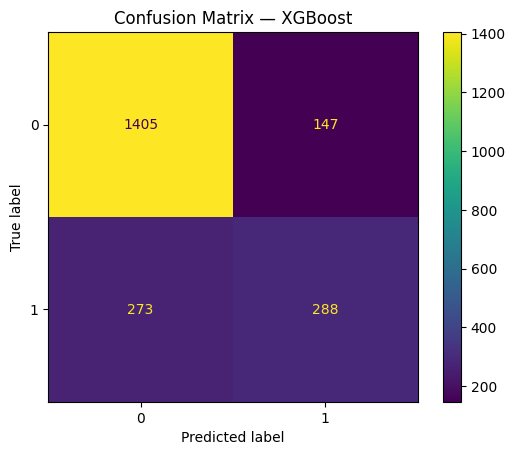

              precision    recall  f1-score   support

    No churn       0.84      0.91      0.87      1552
       Churn       0.66      0.51      0.58       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [20]:
ConfusionMatrixDisplay.from_predictions(y_true_num, y_pred, display_labels=[0,1])
plt.title(f"Confusion Matrix — {model_name}")
plt.show()

print(classification_report(y_true_num, y_pred, target_names=["No churn","Churn"]))

*According to the Confusion Matrix, if we contacted everyone the model flagged, we’d contact 435 customers. Of those, 288 are truly at risk (good use of capacity), but 147 will be unnecessary contacts. There would also be 273 churners that are missed.* 

##### ROC & Precision–Recall Curves

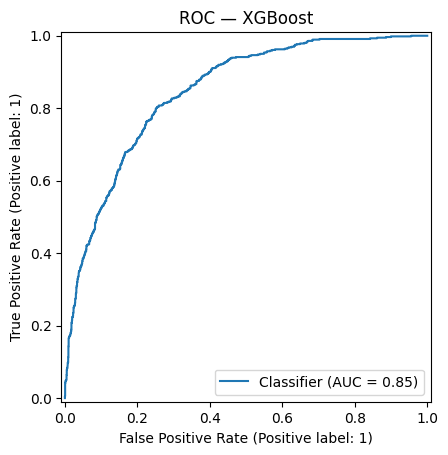

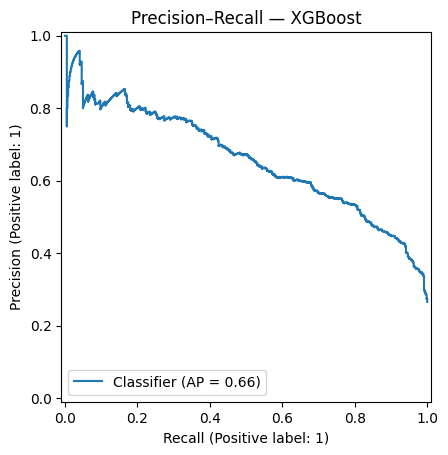

In [21]:
if y_proba is not None:
    RocCurveDisplay.from_predictions(y_true_num, y_proba)
    plt.title(f"ROC — {model_name}")
    plt.show()

    PrecisionRecallDisplay.from_predictions(y_true_num, y_proba)
    plt.title(f"Precision–Recall — {model_name}")
    plt.show()
else:
    print("Model does not expose probabilities; skipping ROC/PR curves.")

*On the ROC curve, AUC was 0.85 and has a strong bow to top-left. This says that the model ranks churners above non-churners reliably.*

*Meanwhile, the Precision–Recall curve has an Average Precision of 0.66 versus the base churn rate of 0.27. This says that the model concentrates true churners near the top of the score list (which is useful for top-decile targeting).*

#### Threshold Selection

In [22]:
chosen_th = None
if y_proba is not None:
    ths = np.linspace(0.10, 0.90, 17)
    rows = []
    for th in ths:
        y_hat = (y_proba >= th).astype(int)
        rows.append({
            "threshold": th,
            "precision": precision_score(y_true_num, y_hat, zero_division=0),
            "recall":    recall_score(y_true_num, y_hat, zero_division=0),
            "f1":        f1_score(y_true_num, y_hat, zero_division=0),
            "accuracy":  accuracy_score(y_true_num, y_hat)
        })
    th_df = pd.DataFrame(rows).set_index("threshold")
    display(th_df.style.format("{:.3f}"))

    # Example business rule: meet recall ≥ 0.70, then maximize precision (tie-breaker F1)
    target_recall = 0.70
    cand = th_df[th_df["recall"] >= target_recall]
    if not cand.empty:
        chosen_th = cand.sort_values(["precision","f1"], ascending=False).index[0]
        r = th_df.loc[chosen_th]
        print(f"Recommended threshold ≈ {chosen_th:.2f} (Recall {r['recall']:.2f}, Precision {r['precision']:.2f}, F1 {r['f1']:.2f})")
    else:
        chosen_th = th_df["f1"].idxmax()
        r = th_df.loc[chosen_th]
        print(f"No threshold met recall ≥ {target_recall:.0%}. Using F1-optimal {chosen_th:.2f} "
              f"(Recall {r['recall']:.2f}, Precision {r['precision']:.2f}, F1 {r['f1']:.2f})")
else:
    print("Threshold selection requires probabilities; skipped.")

,precision,recall,f1,accuracy
threshold,,,,
0.100000,0.406,0.941,0.567,0.619
0.150000,0.448,0.900,0.598,0.679
0.200000,0.477,0.850,0.612,0.713
0.250000,0.506,0.818,0.625,0.739
0.300000,0.540,0.768,0.634,0.765
0.350000,0.564,0.715,0.631,0.778
0.400000,0.598,0.651,0.623,0.791
0.450000,0.619,0.574,0.596,0.793
0.500000,0.662,0.513,0.578,0.801


Recommended threshold ≈ 0.35 (Recall 0.71, Precision 0.56, F1 0.63)


*The model outputs a probability of customer churn (0–1). The decision threshold (T) is the cutoff above which we classify a customer as “will churn.” Default is T = 0.50, but there’s no rule that 0.50 is optimal.*

*For retention use-cases, it’s preferable to catch more at-risk customers (higher recall), while keeping precision workable so offers aren’t wasted. So an example of this trade-off is that increasing T improves precision, but drops recall (at T = 0.55 precision is 0.70 and recall is 0.39). So we would choose T based on offer cost, team capacity, and target save-rate. Our recommendation would be to start with T = 0.35 for the pilot. After that we'd like to review monthly and adjust based on measured incremental saves and contact capacity.*

#### Feature/Driver Insights

,feature,importance
14,Contract,0.074086
4,tenure,0.045228
7,InternetService,0.009645
17,MonthlyCharges,0.008979
18,TotalCharges,0.005528
16,PaymentMethod,0.004410
8,OnlineSecurity,0.004323
11,TechSupport,0.003264
6,MultipleLines,0.002633
15,PaperlessBilling,0.001634


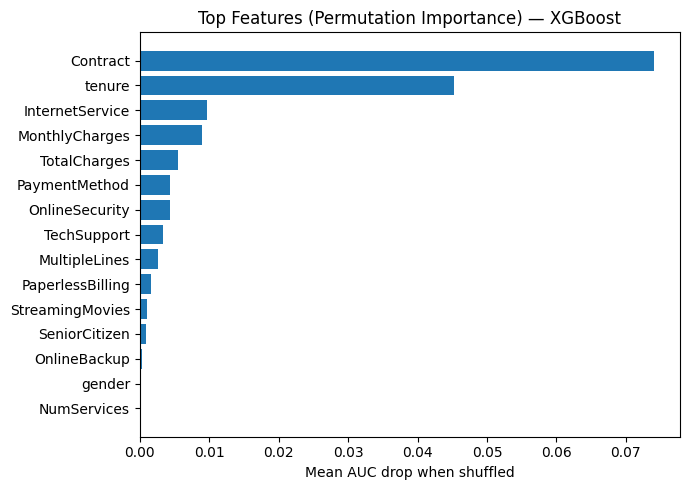

In [23]:
result = permutation_importance(model, X_test, y_true_num, n_repeats=10, random_state=42, scoring="roc_auc")
imp = pd.DataFrame({
    "feature": getattr(X_test, "columns", np.arange(X_test.shape[1])),
    "importance": result.importances_mean
}).sort_values("importance", ascending=False).head(15)

display(imp)

plt.figure(figsize=(7,5))
plt.barh(imp["feature"][::-1], imp["importance"][::-1])
plt.title(f"Top Features (Permutation Importance) — {model_name}")
plt.xlabel("Mean AUC drop when shuffled")
plt.tight_layout()
plt.show()

*Driver insights explain which inputs most influenced predictions. This shuffles through one feature at a time and if model AUC drops a lot then that feature was important for prediction.*

*Month-to-month contracts, short tenure, and higher charges (without bundles) are associated with higher churn risk. It's important to note that the importance reflects predictive influence, and not necessarily causality. This information is best used as additional insight into who they target, what they offer, and when they intervene.*

## 9. Discussion and Conclusion

Aligned with our objective of predicting churn in the next billing cycle and enabling targeted retention, the final XGBoost model delivered strong ranking quality (Test ROC-AUC of 0.846). To reflect the business reality that missing a true churner is costly, we chose to operate at T = 0.35, therefore capturing  about 71% of churners with about 56% precision (F1 of 0.63). This turns the score into an actionable program based on their business goals. Each week they should prioritize outreach to the top risk customers with playbooks targeted to key drivers. We found those key drives to be month-to-month contracts, short tenure, higher charges, Internet service type, and absence of OnlineSecurity/TechSupport. This information can be utilized after recognizing a potential churn customer to narrow in on what the issue is and base the incentive/outreach based on that. If customer A is influenced by higher charges a special discount may be enough to keep them, and so on. 

Limitations for this project include unknown false-negative/false-positive costs. We do not have information on how much the company will lose if they don't label a churner before they churn, or what the cost is if we offer a promotional offer to someone that was not going to churn. There is also a concern of non-causal interpretation of drivers, and missing behavioral/support features, so those are things we would be weary of moving forward with the project. Our suggested next steps include: 
- Run an A/B holdout: split targeted customers into Treatment (receive outreach/offer) and Holdout (no outreach). Compare churn rates and revenue after 30–60 days to estimate incremental saves and incremental Return On Ad Spend
- Re-tune the threshold as costs/capacity are specified: if we are able to define costs, then we can review thresholds that minimizes those costs and track that for an extended period of time to see seasonality or volume fluctuations
- Enrich features: taking a deeper dive into aspects of the customer and their interaction with the service (did they lose service and it took too long to come back, do they log into the app frequently, do they make late payments, are just some ideas) as this can help us adjust a model that can understand customers that are price sensitive versus unhappy with the service, and we can focus in on the retention offer to match that